In [19]:
import sys
import os
import time
from pathlib import Path
import numpy as np
import pandas as pd
from PIL import Image
import math
import matplotlib.pyplot as plt
from zipfile import ZipFile
from IPython.display import Image as display_image
from IPython.display import display
from IPython.display import display, clear_output
from matplotlib.pyplot import imshow
import ipywidgets as widgets
import matplotlib.image as mpimg
import time
    
#%load_ext autoreload
#%autoreload 2
pd.options.display.max_columns = 999
%matplotlib inline

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Read in file names from insta and ebay zips

In [121]:
def zipToDf(zip_file):
    #collect all file names contained in zip file
    with ZipFile(zip_file, 'r') as f:
        file_names = f.namelist()
    
    df = pd.DataFrame({'path':file_names})
    
    #remove directories
    df = df.loc[df.path.str.slice(-1) != '/']
    
    #remove 
    
    return df

def showImage(zip_file_loc, current_file_path):
    try:
        with ZipFile(zip_file_loc) as zipf:
            with zipf.open(current_file_path) as f:
                    img = Image.open(f)
                    imshow(np.asarray(img))
                    plt.axis('off')
                    plt.show()
    except Exception as e:
        print(e)
        
def unzipImageData(zip_file_loc, file_path):
    try:
        with ZipFile(zip_file_loc, 'r') as zipf:
            with zipf.open(file_path) as f:
                img = image.load_img(f, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)
                    
                return img_data
    except Exception as e:
        print(e)
        
def zipToEmbedding(zip_file_loc, file_path, model):
    try:
        with ZipFile(zip_file_loc, 'r') as zipf:
            with zipf.open(file_path) as f:
                img = image.load_img(f, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)
                vgg16_feature = model.predict(img_data)
                return np.array(vgg16_feature).flatten()
                     
                        
    except Exception as e:
        print(e)
        
        
def plotClusters(embeddings, clust_labels):
    pca = PCA(n_components=2)

    embed_reduced = pca.fit_transform(embeddings).tolist()

    plot_dat = pd.DataFrame(embed_reduced, columns=['comp_1','comp_2'])

    plot_dat['Label'] = clust_labels

    plt.scatter(plot_dat['comp_1'], plot_dat['comp_2'], c=plot_dat['Label'])

    plt.show()

In [12]:
insta_zip_file = '/Users/chrisjonas/projects/GitHub/insta_images/data/vintagepolo/images.zip'

insta_df = zipToDf(insta_zip_file)

ebay_zip_file = '/Users/chrisjonas/projects/GitHub/ebay_images/data/polo/images.zip'

ebay_df = zipToDf(ebay_zip_file)

In [51]:
len(ebay_df)

16256

In [16]:
# load model

model = VGG16(weights='imagenet', include_top=False)
#model.summary()

#print(vgg16_feature.shape)

W0913 21:28:09.393445 140736910767040 deprecation_wrapper.py:119] From /Users/chrisjonas/miniconda3/envs/fashion_mnist_vgg/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 21:28:09.562034 140736910767040 deprecation_wrapper.py:119] From /Users/chrisjonas/miniconda3/envs/fashion_mnist_vgg/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 21:28:09.606321 140736910767040 deprecation_wrapper.py:119] From /Users/chrisjonas/miniconda3/envs/fashion_mnist_vgg/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 21:28:09.667677 140736910767040 deprecation_wrapper.py:119] From /Users/chrisjonas/miniconda3/envs/fashion_mnist_vgg/lib/python3.7/site-packages/keras/back

In [17]:
vgg16_feature = model.predict(unzipImageData(insta_zip_file,insta_df.path.iloc[0]))

In [18]:
print(vgg16_feature.shape)

(1, 7, 7, 512)


In [36]:
7*7*512

25088

In [143]:
if np.array(zipToEmbedding(insta_zip_file, insta_df.loc[304].path, model)):
    print('empty')

cannot identify image file <zipfile.ZipExtFile name='46739451_305286533526973_7955196163872453208_n.jpg.part' mode='r' compress_type=deflate>


cannot identify image file <zipfile.ZipExtFile name='46739451_305286533526973_7955196163872453208_n.jpg.part' mode='r' compress_type=deflate>


In [ ]:
#tic = time.process_time()

vgg16_feature_list = []

for img_path in insta_df[:1000].path:
    curr_img = insta_df.index[insta_df['path'] == img_path].tolist()[0]
    if curr_img % 10 == 0:
        print("Processing image number %s" % curr_img)
    vgg16_feature = zipToEmbedding(insta_zip_file, img_path, model)
    #vgg16_feature_list.append(vgg16_feature)
    vgg16_feature_np = np.array(vgg16_feature)
    
    if vgg16_feature_np.size > 1:
        vgg16_feature_list.append(vgg16_feature_np.flatten())
    
#toc = time.process_time()

#print(toc-tic)

Processing image number 0


In [21]:
# took 50 minutes to score 1000 images

# perform k-means on embeddings

In [ ]:
for i in range(2,5):
    kmeans = KMeans(n_clusters=i, random_state=0)
    km = kmeans.fit_transform(vgg16_feature_list)
    print(i)
    plotClusters(vgg16_feature_list, kmeans.labels_.tolist())

In [85]:
kmeans = KMeans(n_clusters=3, random_state=0)

km = kmeans.fit_transform(vgg16_feature_list)

clust_labels = kmeans.labels_.tolist()

centers = np.array(kmeans.cluster_centers_)

In [87]:
clust_dat = pd.DataFrame({'ImagePath': ebay_df[:999].path
                         ,'Cluster': clust_labels
                         ,'embed': vgg16_feature_list})

In [ ]:
clust_dat['dist_to_cent'] = clust_dat.apply(lambda x: np.linalg.norm(x['embed']-centers[x['Cluster']]), axis=1)

In [169]:
top_clust_0 = (clust_dat[clust_dat.Cluster == 0].sort_values(by='dist_to_cent'))[:10]

top_clust_1 = (clust_dat[clust_dat.Cluster == 1].sort_values(by='dist_to_cent'))[:10]

top_clust_2 = (clust_dat[clust_dat.Cluster == 2].sort_values(by='dist_to_cent'))[:10]

In [ ]:
'sha1:6ac398fd809d:88b72a4034e1de54a4f5f042b8dd876c2b27c693'

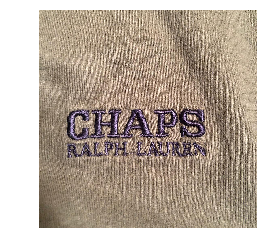

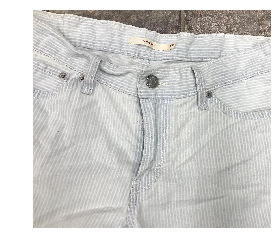

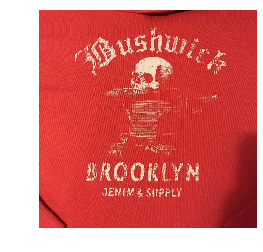

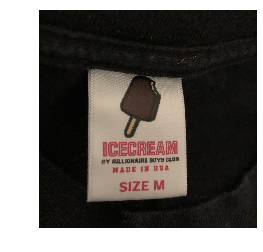

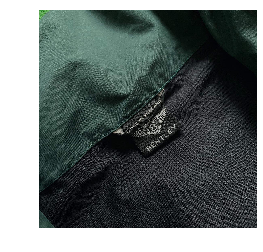

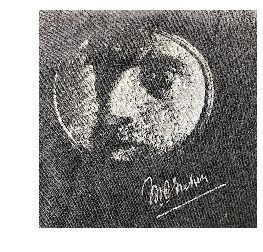

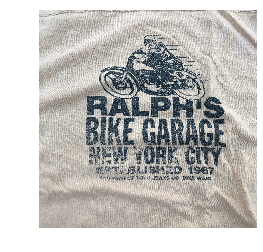

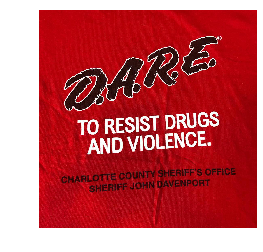

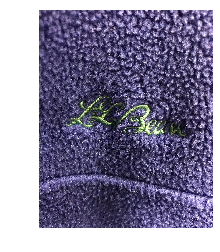

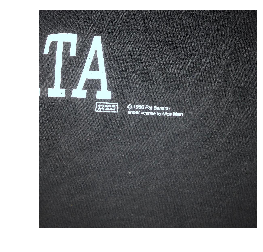

In [170]:
for path in top_clust_0.ImagePath:
    showImage(insta_zip_file,path)

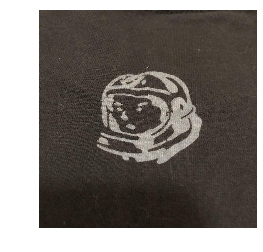

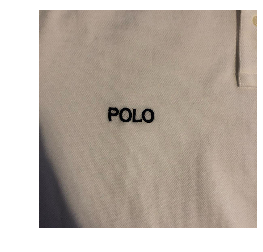

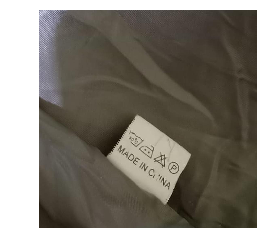

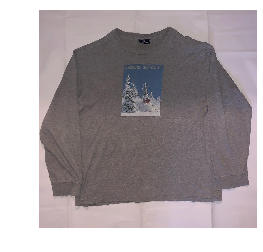

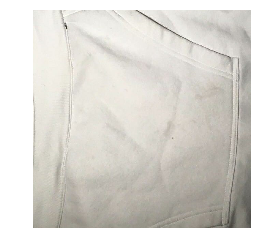

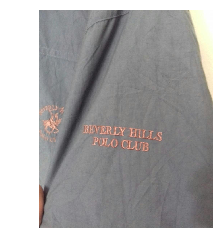

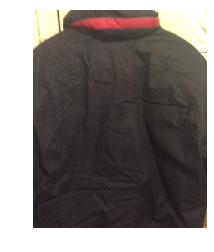

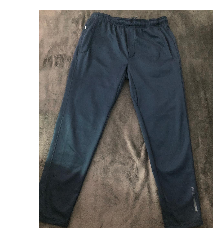

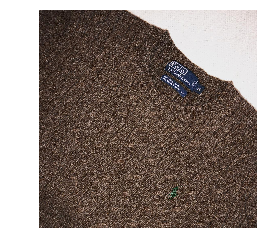

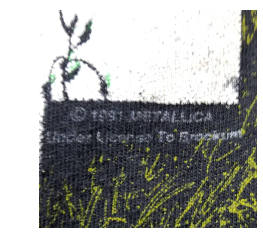

In [172]:
for path in top_clust_1.ImagePath:
    showImage(insta_zip_file,path)

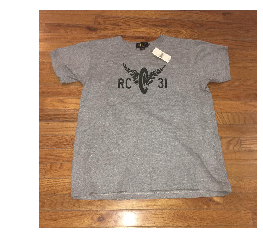

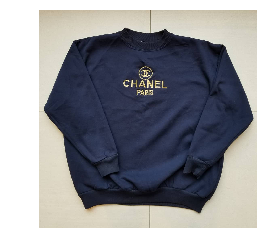

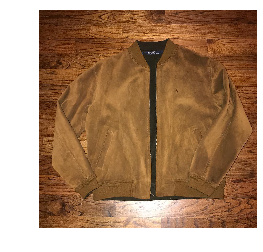

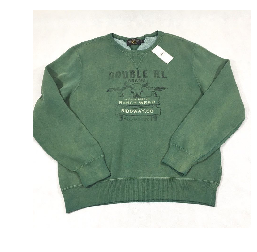

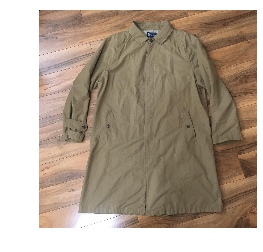

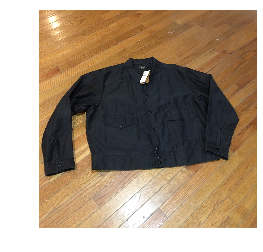

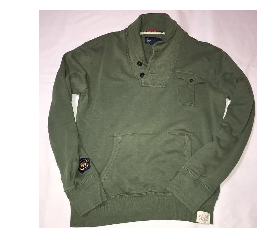

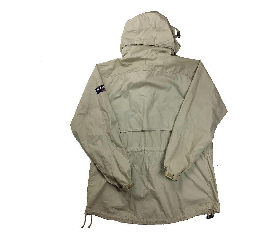

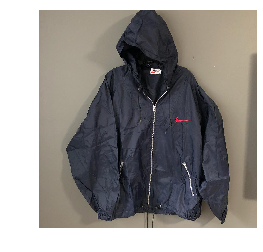

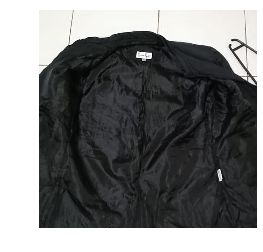

In [171]:
for path in top_clust_2.ImagePath:
    showImage(insta_zip_file,path)

In [39]:
samp_embed = zipToEmbedding(insta_zip_file, 'vintagepolo/10597301_261438900718846_1711758097_n.jpg', model)

In [43]:
d = kmeans.transform(samp_embed)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Perform PCA on ebmeddings in order to visualize results

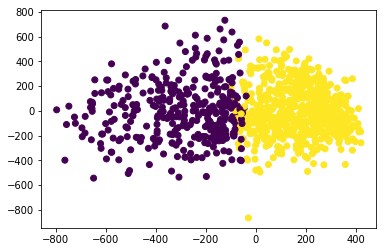